In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
data1 = pd.read_csv('../data/chisato/goal/log201805261417.csv',header=None)
data2 = pd.read_csv('../data/chisato/goal/log201805261602.csv',header=None)
data3 = pd.read_csv('../data/chisato/goal/log201805261614.csv',header=None)
d = pd.concat([pd.concat([data1,data2]),data3])
#print(ball)
#print(joy)

In [3]:
d.columns = ['bx','by','jx','jy']
d = d[d.bx!=-1]

In [4]:
from sklearn.cross_validation import train_test_split

ball = np.array(d.iloc[:,0:2])
joy = np.array(d.iloc[:,2:4])
IN_train, IN_test, TAR_train, TAR_test = train_test_split(ball,joy,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])

[277.32284546  58.03263474]
[ 387.7158813 -119.988327 ]
[-0.03094482 -1.        ]
[ 0.99996948 -0.53610229]


C:\Users\cihsato\Anaconda3\envs\tensorflow16\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#　初期化
sess = tf.Session()
seed = 3
#tf.set_random_seed(seed)
#np.random.seed(seed)
IN_size = 2
TAR_size = 2
INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [6]:
hidden_size = [25, 50, 25, 3]
batch_size = 100
iter_size = 200

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize], stddev=10.0)))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize], stddev=10.0)))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size], stddev=10.0)))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size], stddev=10.0)))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 25), dtype=float32)
Tensor("Relu_1:0", shape=(?, 50), dtype=float32)
Tensor("Relu_2:0", shape=(?, 25), dtype=float32)
Tensor("Relu_3:0", shape=(?, 3), dtype=float32)
Tensor("Add_4:0", shape=(?, 2), dtype=float32)


In [7]:
#　学習
loss = tf.reduce_mean(tf.abs(TARGET - final_output))
opt = tf.train.AdamOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
loss_vec=[]
for i in range(iter_size):
    rand_index = np.random.choice(len(IN_train), size=batch_size)
    rand_in = IN_train[rand_index]
    rand_tar = TAR_train[rand_index]
    sess.run(train_step, feed_dict={INPUT:rand_in, TARGET: rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
    if (i+1)%25==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

[[ 313.72092     21.373112 ]
 [ 396.39368     61.76061  ]
 [ 329.79953     66.917625 ]
 [ 381.93802    -81.07548  ]
 [ 240.57909      9.948854 ]
 [ 286.7467     150.11885  ]
 [ 257.1071       8.111832 ]
 [ 400.97318     17.129225 ]
 [ 341.81006   -119.1928   ]
 [ 321.21997    -21.992706 ]
 [ 384.41364   -107.77299  ]
 [ 447.73044     43.351116 ]
 [ 418.74603    -15.236775 ]
 [ 361.06775   -128.62976  ]
 [ 387.8612    -107.68007  ]
 [ 341.81006   -119.1928   ]
 [ 369.92737    -69.89322  ]
 [ 386.4031       6.7408614]
 [ 287.59576     31.880182 ]
 [ 283.117       16.600435 ]
 [ 447.75378    -67.00077  ]
 [ 248.96007    -10.207595 ]
 [ 327.3512     -56.07416  ]
 [ 305.3658      -3.0876532]
 [ 367.8921     129.14822  ]
 [ 293.29465      7.6229324]
 [ 357.26828     84.39511  ]
 [ 362.3944     -16.418703 ]
 [ 382.28995    -23.499746 ]
 [ 312.72916     40.395187 ]
 [ 248.96007    -10.207595 ]
 [ 319.91278    127.875336 ]
 [ 344.38596     -8.649082 ]
 [ 351.49158    122.33976  ]
 [ 411.40228  

[[ 364.44937    -66.296135 ]
 [ 379.7696     -92.89187  ]
 [ 398.18646    130.35779  ]
 [ 379.7696     -92.89187  ]
 [ 457.20007     27.34879  ]
 [ 284.80334    -15.11642  ]
 [ 499.9057      34.40267  ]
 [ 357.481       92.35221  ]
 [ 249.16084    -76.50496  ]
 [ 393.30496     19.169643 ]
 [ 387.8612    -107.68007  ]
 [ 436.11908   -108.027855 ]
 [ 302.51538    172.88493  ]
 [ 384.41364   -107.77299  ]
 [ 355.50644    -18.656582 ]
 [ 329.98016    101.8006   ]
 [ 354.4343     -65.80269  ]
 [ 299.30963     88.25972  ]
 [ 257.72943     60.621494 ]
 [ 391.81152    -78.28835  ]
 [ 502.95944    -90.66522  ]
 [ 274.84824     -5.983905 ]
 [ 370.27228      9.934475 ]
 [ 393.30496     19.169643 ]
 [ 502.96536      8.024084 ]
 [ 256.4146     -48.635983 ]
 [ 457.2518      60.333157 ]
 [ 394.8037       9.671016 ]
 [ 381.93808    -81.075485 ]
 [ 298.98508     83.66375  ]
 [ 447.7538     -67.00077  ]
 [ 349.8374     -41.870712 ]
 [ 341.81006   -119.1928   ]
 [ 339.81854    137.58992  ]
 [ 394.1772   

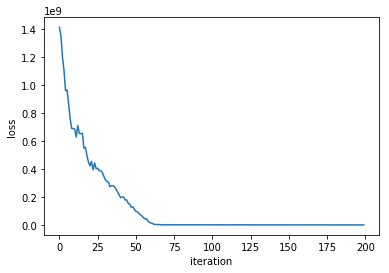

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(loss_vec)
#plt.xlim(0,25)
#plt.ylim(0,1)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')

In [9]:
# predict
p = sess.run(final_output, feed_dict={INPUT: IN_test})
print(p)

[[-28.898394  -9.722473]
 [-28.898394  -9.722473]
 [-28.898394  -9.722473]
 ...
 [-28.898394  -9.722473]
 [-28.898394  -9.722473]
 [-28.898394  -9.722473]]
